In [16]:
import subprocess
import matplotlib.pyplot as plt
import numpy as np

In [17]:
import yaml

def update_config_file(file_path, parameter_values):
    # Load the YAML configuration file
    with open(file_path, 'r') as yaml_file:
        config = yaml.load(yaml_file, Loader=yaml.FullLoader)

    # Update the specified parameters with the new values
    for parameter, value in parameter_values.items():
        config[parameter] = value

    # Save the modified configuration back to the file
    with open(file_path, 'w') as yaml_file:
        yaml.dump(config, yaml_file, default_flow_style=False)


In [38]:
def running(config_file_path):
    parameter_values = {'root_path': './data/'}
    update_config_file(config_file_path, parameter_values)

    shots = [1,2,4,8,16]
    for i in shots:
        parameter_values = {'shots': i}
        #print(parameter_values)
        update_config_file(config_file_path, parameter_values)
        result = subprocess.run(f'CUDA_VISIBLE_DEVICES=0 python3 main_new.py --config {config_file_path}', shell = True, capture_output=True, text=True)

        if result.returncode != 0:
            print(result.stderr)


In [19]:
def plot(config_file_path):

    file_path1 = './Tip-Adapter-main (1)/Tip-adapter_Result'

    with open(file_path1, 'r') as file:
        content = file.readlines()

    # Convert each line to a float and store in a list
    Tip = [float(line.strip()) for line in content]


    file_path2 = './Tip-Adapter-main (1)/Tip-adapter_Result'

    with open(file_path2, 'r') as file:
        content = file.readlines()

    # Convert each line to a float and store in a list
    Tip_F = [float(line.strip()) for line in content]

    # Plot
    name = config_file_path.split('/')[-1].split('.')[0]
    shots = [1,2,4,8,16]
    plt.figure()
    plt.plot(shots, Tip, label = 'Tip-Adapter', color = 'b', marker = 'o')
    plt.plot(shots, Tip_F, label = 'Tip-Adapter-F', color = 'g', marker = 'o')
    plt.legend()
    plt.title(name)
    plt.xlabel('Number of labeled training samples per class')
    plt.ylabel('Score(%)')
    plt.xlim(0,17)
    plt.ylim(min(min(Tip), min(Tip_F)), max(max(Tip), max(Tip_F)))
    plt.show()

In [20]:
def remove_result_file():
    with open('Tip-adapter-F_Result', 'w'):
        pass
    with open('Tip-adapter_Result', 'w'):
        pass

# caltech-101

## Load data

## Running

In [24]:
config_file_path = 'Tip-Adapter-main (1)\Tip-Adapter-main\configs\caltech101.yaml'

**Train model**

In [25]:
remove_result_file()

In [39]:
running(config_file_path)

'python3' is not recognized as an internal or external command,
operable program or batch file.

'python3' is not recognized as an internal or external command,
operable program or batch file.

'python3' is not recognized as an internal or external command,
operable program or batch file.

'python3' is not recognized as an internal or external command,
operable program or batch file.

'python3' is not recognized as an internal or external command,
operable program or batch file.



**Plot the result**

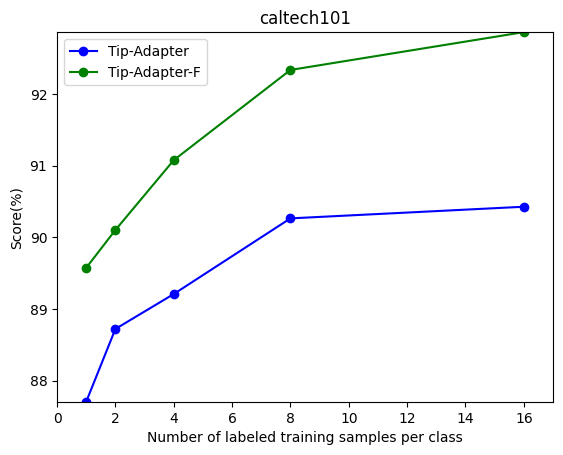

In [ ]:
plot(config_file_path)

In [ ]:
!rm -r /content/DATA/caltech-101

## With different visual encoder


In [ ]:
%cd Tip-Adapter/

/content/Tip-Adapter


In [ ]:
config_file_path = '/content/Tip-Adapter/configs/caltech101.yaml'

**Train model**

In [ ]:
remove_result_file()

In [ ]:
running_new(config_file_path)

**Plot the result**

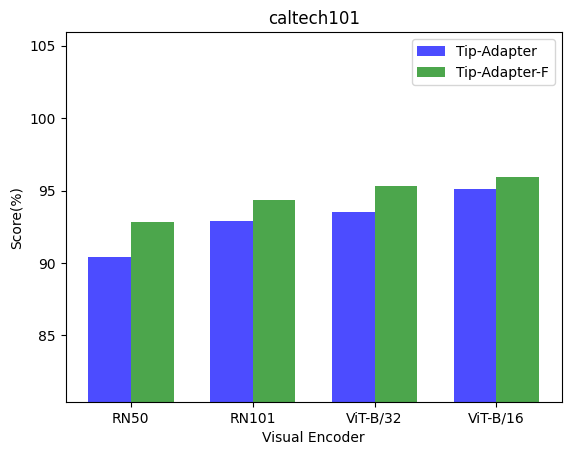

In [ ]:
plot_new(config_file_path)

In [ ]:
!rm -r /content/DATA/caltech-101